(500, 6)
(500,)


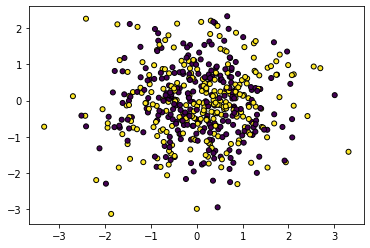

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = make_classification(n_samples=500, n_features=6, random_state=2)
print(X.shape)
print(y.shape)

plt.scatter(X[:, 0], X[:, 3], marker='o', c=y, s=25, edgecolor='k')

# look at the data...it is likely not linearly separable!

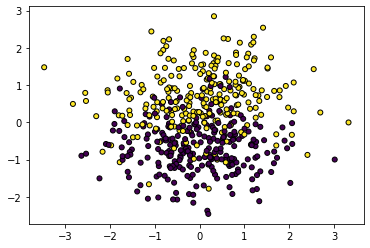

In [2]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=25, edgecolor='k')

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [7]:
class GaussianNaiveClassification():
    
    def __init__(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    
    def naive_bayesian(self):
        mean, std = self.mean_std(k=2) # k is classes
        likelihood0 = self.gaussian_pdf(X_test, mean[0, :], std[0, :])
        likelihood1 = self.gaussian_pdf(X_test, mean[1, :], std[0, :])
        print("\nLIKELIHOOD0:\n", likelihood0.shape)
        print("\nLIKELIHOOD1:\n", likelihood1.shape)
        assert likelihood0.shape == (X_test.shape[0], X_test.shape[1]), "Shape is wrong for pdf0!"
        assert likelihood1.shape == (X_test.shape[0], X_test.shape[1]), "Shape is wrong for pdf1!"
        total_likelihood0 = np.prod(likelihood0, axis=1)
        total_likelihood1 = np.prod(likelihood1, axis=1)
        print("\nTOTAL_LIKELIHOOD0:\n", total_likelihood0.shape)
        print("\nTOTAL_LIKELIHOOD1:\n", total_likelihood1.shape)
        m0 = len(X_train[y_train==0])
        m1 = len(X_train[y_train==1])
        print("\nm0 and m1:",m0, m1)
        prior0 = m0 / (m0 + m1)
        prior1 = m1 / (m0 + m1)
        print("\nprior0 and prior1:", prior0, prior1)
        assert prior0 + prior1 == 1, "probability not equal 1"        
        # Posterior calcs p(x|y)p(y)
        # P(class0) * P(feature1|class0) * P(feature2|class0)
        posterior0 = prior0 * total_likelihood0    
        # P(class1) * P(feature1|class1) * P(feature2|class1)
        posterior1 = prior1 * total_likelihood1
        print("\nposterior0 and posterior1 shapes:", posterior0.shape, posterior1.shape)
        yhat = 1 * posterior1 > posterior0
        print("yhat:\n",yhat)
        print("y:\n", y)
        return yhat
        
    def mean_std(self, k=2):
        n = X_train.shape[1]
        mean = np.zeros((2, n))
        std = np.zeros((2, n))
        for label in [0, 1]:
            mean[label, :] = self.X_train[self.y_train==label].mean(axis=0)
            std[label, :]  = self.X_train[self.y_train==label].std(axis=0)
        assert mean.shape == (2, self.X_train.shape[1])
        assert std.shape == (2, self.X_train.shape[1])
        print("MEAN:\n", mean, mean.shape)
        print("\nSTD:\n", std, std.shape)
        return mean, std
    
    def gaussian_pdf(self, X_test, mean, std):
        left = 1 / (np.sqrt(2 * np.pi) * std)
        e = (X_test - mean) ** 2 / (2 * (std ** 2))
        right = np.exp(-e)
        return left*right

In [9]:
model1 = GaussianNaiveClassification(X_train, y_train)
yhat = model1.naive_bayesian()

MEAN:
 [[-0.02372779 -0.67139245  0.66749931 -0.0311694   0.22046432 -0.00502101]
 [ 0.05764306  0.6751644  -0.65529266  0.08836461 -0.27328732  0.0619385 ]] (2, 6)

STD:
 [[0.93541742 0.68055447 0.70811608 1.00529286 0.93629638 0.98213037]
 [1.07690442 0.80318513 0.78032663 1.03333645 1.02579147 1.02643627]] (2, 6)

LIKELIHOOD0:
 (150, 6)

LIKELIHOOD1:
 (150, 6)

TOTAL_LIKELIHOOD0:
 (150,)

TOTAL_LIKELIHOOD1:
 (150,)

m0 and m1: 182 168

prior0 and prior1: 0.52 0.48

posterior0 and posterior1 shapes: (150,) (150,)
yhat:
 [False  True  True False False  True  True  True  True False False False
 False False  True False False False  True  True False  True  True  True
  True  True False False False  True False  True  True False False False
  True  True False  True  True  True  True False False False  True False
  True False  True False  True  True  True False  True False False  True
  True  True False False False  True  True  True  True  True  True  True
 False  True False  True False  Tr

In [10]:
from sklearn.metrics import average_precision_score, classification_report
print("=========Average precision score=======")
print(average_precision_score(y_test, yhat))
print("=========Classification report=======")
print("Report: ", classification_report(y_test, yhat))

=========Average precision score=======
0.808888888888889
=========Classification report=======
Report:                precision    recall  f1-score   support

           0       0.83      0.86      0.84        72
           1       0.87      0.83      0.85        78

    accuracy                           0.85       150
   macro avg       0.85      0.85      0.85       150
weighted avg       0.85      0.85      0.85       150



In [14]:
#using built-in sklearn

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

yhat = model.predict(X_test)
print("=========Average precision score=======")
print(average_precision_score(y_test, yhat))
print("=========Classification report=======")
print("Report: ", classification_report(y_test, yhat))

=========Average precision score=======
0.7970495258166491
=========Classification report=======
Report:                precision    recall  f1-score   support

           0       0.81      0.86      0.83        72
           1       0.86      0.81      0.83        78

    accuracy                           0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.84      0.83      0.83       150

